In [47]:
import numpy as np
!pip install geopandas
import pandas as pd
import warnings
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline
import random
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()
from wordcloud import WordCloud , ImageColorGenerator
from PIL import Image
!python3.7 -m pip install --upgrade pip
!pip install pywaffle
from pywaffle import Waffle 
import seaborn as sns
from wordcloud import WordCloud
from PIL import Image 


In [22]:
df = pd.read_csv('indian_food.csv')
df=df.replace(-1,np.nan)
df=df.replace('-1',np.nan)

In [23]:
df

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45.0,25.0,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80.0,30.0,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15.0,60.0,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15.0,30.0,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15.0,40.0,sweet,dessert,West Bengal,East
...,...,...,...,...,...,...,...,...,...
1015,Til Pitha,"Glutinous rice, black sesame seeds, gur",vegetarian,5.0,30.0,sweet,dessert,Assam,North East
1016,Bebinca,"Coconut milk, egg yolks, clarified butter, all...",vegetarian,20.0,60.0,sweet,dessert,Goa,West
1017,Shufta,"Cottage cheese, dry dates, dried rose petals, ...",vegetarian,NaN,NaN,sweet,dessert,Jammu & Kashmir,North
1018,Mawa Bati,"Milk powder, dry fruits, arrowroot powder, all...",vegetarian,20.0,45.0,sweet,dessert,Madhya Pradesh,Central


### Proportion of Vegetarian and Non-Vegetarian dishes <a class="anchor" id="chapter1"></a>

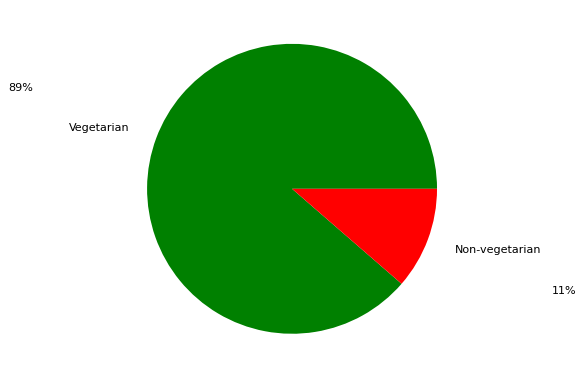

In [24]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
veg = 0
non_veg = 0
for index, row in df.iterrows():
  if row['diet']=='vegetarian':
    veg += 1
  else:
    non_veg += 1

y = np.array([veg, non_veg])
mylabels = ["Vegetarian", "Non-vegetarian"]
mycolors = ["green", "red"]
plt.pie(y, labels = mylabels, colors = mycolors, autopct='%1.0f%%', pctdistance=2.0, labeldistance=1.2)
plt.show() 

### Number of dishes based on regions <a class="anchor" id="section_1_1"></a>

In [26]:
df = df.dropna()

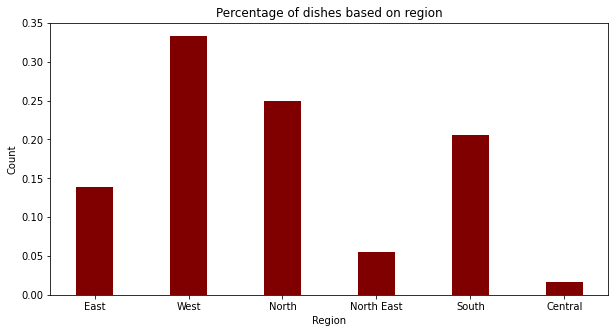

In [27]:
region_count = {}

for index, row in df.iterrows():
  # print(row['region'])
  if row['region'] in region_count:
    region_count[row['region']] += 1
  else:
    region_count[row['region']] = 1

region_count = {k: v / total for total in (sum(region_count.values()),) for k, v in region_count.items()}

courses = list(region_count.keys())
values = list(region_count.values())

fig = plt.figure(figsize = (10, 5))

plt.bar(courses, values, color = 'maroon', width = 0.4)
 
plt.xlabel("Region")
plt.ylabel("Count")
plt.title("Percentage of dishes based on region")
plt.show()

### Number of dishes based on courses of meal <a class="anchor" id="section_1_2_1"></a>

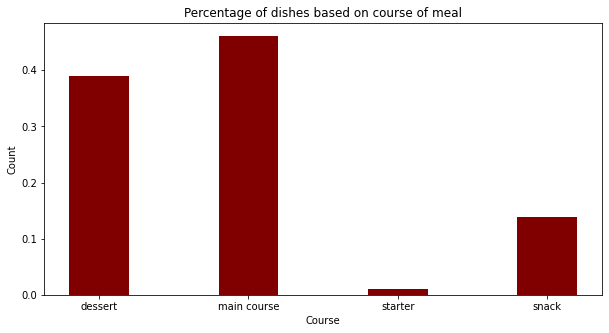

In [28]:
course_count = {}

for index, row in df.iterrows():
  # print(row['region'])
  if row['course'] in course_count:
    course_count[row['course']] += 1
  else:
    course_count[row['course']] = 1

course_count = {k: v / total for total in (sum(course_count.values()),) for k, v in course_count.items()}

courses = list(course_count.keys())
values = list(course_count.values())

fig = plt.figure(figsize = (10, 5))

plt.bar(courses, values, color = 'maroon', width = 0.4)
 
plt.xlabel("Course")
plt.ylabel("Count")
plt.title("Percentage of dishes based on course of meal")
plt.show()

### Proportion of Flavor Profiles <a class="anchor" id="section_1_2_2"></a>

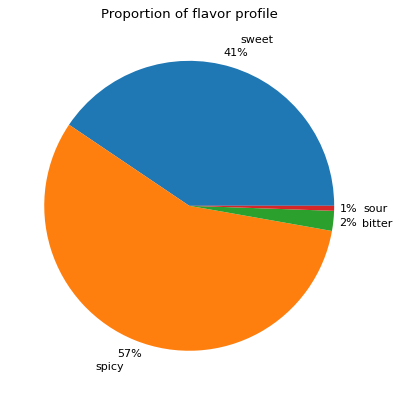

In [29]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
veg = 0
non_veg = 0
fl_count = {}
for index, row in df.iterrows():
  if row['flavor_profile'] in fl_count:
    fl_count[row['flavor_profile']] += 1
  else:
    fl_count[row['flavor_profile']] = 1

flavors = list(fl_count.keys())
counts = list(fl_count.values())
y = np.array(counts)
mylabels = flavors
plt.title("Proportion of flavor profile")
# mycolors = ["green", "red"]
plt.pie(y, labels = mylabels, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
plt.show() 

### Ingredients used in Indian desserts <a class="anchor" id="section_1_2_3"></a>

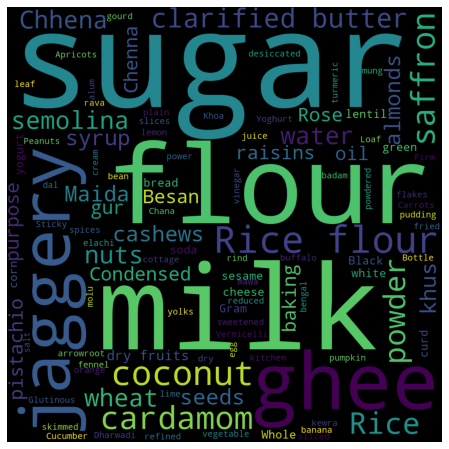

In [31]:
df=df[:180]
dessert_df  = df[df['course']=='dessert'].reset_index()

ingredients = []
for i in range(0,len(dessert_df)):
    text = dessert_df['ingredients'][i].split(',')
    text = ','.join(text)
    ingredients.append(text)
    text = ' '.join(ingredients)

wordcloud = WordCloud(width = 1000, height = 1000, 
                min_font_size = 14).generate(text)                  
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()

### Ingredients used in South-Indian cuisine <a class="anchor" id="section_1_2_4"></a>

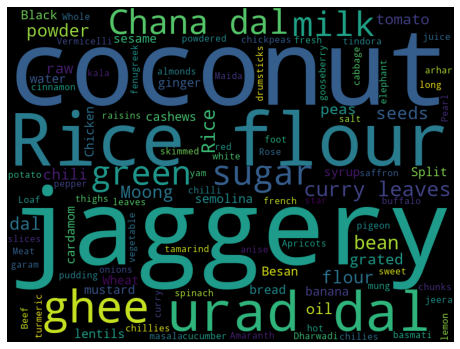

In [32]:
south_df = df[df['region']=='South'].reset_index()

ingredients = []
for i in range(0,len(south_df)):
    text = south_df['ingredients'][i].split(',')
    text = ','.join(text)
    ingredients.append(text)
    text = ' '.join(ingredients)
    
wordcloud = WordCloud(width = 800, height = 600, 
                min_font_size = 14).generate(text)                  
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()

### List of Indian dishes that are sweet in flavor but not desserts <a class="anchor" id="section_1_2_5"></a>

In [33]:
sweet_df = df[df['flavor_profile']=='sweet']
final_sweet_df = sweet_df[sweet_df['course']!='dessert']
final_sweet_df

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
46,Obbattu holige,"Maida flour, turmeric, coconut, chickpeas, jag...",vegetarian,180.0,60.0,sweet,main course,Karnataka,South
85,Dal makhani,"Red kidney beans, urad dal, cream, garam masal...",vegetarian,10.0,60.0,sweet,main course,Punjab,North
243,Mishti Chholar Dal,"Chana dal, fresh coconut, ginger, cinnamon, ra...",vegetarian,10.0,30.0,sweet,main course,West Bengal,East


### Ingredients used in North-Indian cuisine <a class="anchor" id="section_1_2_6"></a>

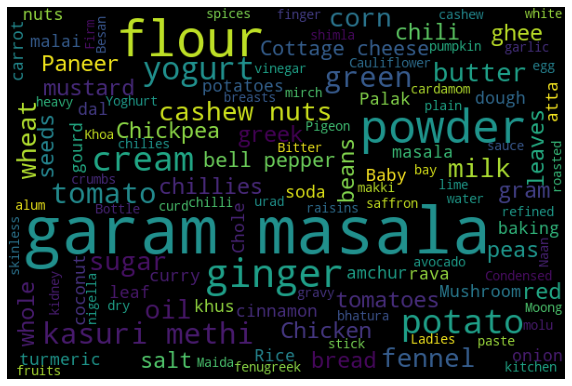

In [34]:
north_df = df[df['region']=='North'].reset_index()

ingredients = []
for i in range(0,len(north_df)):
    text = north_df['ingredients'][i].split(',')
    text = ','.join(text)
    ingredients.append(text)
    text = ' '.join(ingredients)

wordcloud = WordCloud(width = 600, height = 400,                    
                min_font_size = 14).generate(text)                  
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()

### Comparing preparation time and cooking time for Veg and Non Veg dishes <a class="anchor" id="section_1_2_8"></a>

In [ ]:
prep_time = []
cook_time = []

prep_time_n = []
cook_time_n = []

for index, row in df.iterrows():
  if row['diet']=='vegetarian':
    prep_time.append(row['prep_time'])
    cook_time.append(row['cook_time'])
  else:
    prep_time_n.append(row['prep_time'])
    cook_time_n.append(row['cook_time'])

plt.figure(figsize = (8, 8))
plt.scatter(cook_time, prep_time)
plt.title('Vegetarian')
plt.xlabel("cooking time")
plt.ylabel("preparation time")
plt.show()

plt.figure(figsize = (8, 8))
plt.scatter(cook_time_n, prep_time_n)
plt.title('Non-vegetarian')
plt.xlabel("cooking time")
plt.ylabel("preparation time")
plt.show()

### Ingredients used in Vegetarian food <a class="anchor" id="section_1_2_10"></a>

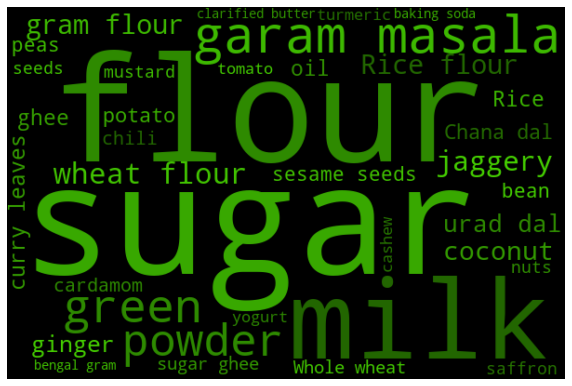

In [41]:
veg_df = df[df['diet']=='vegetarian'].reset_index()

ingredients = []
for i in range(0,len(veg_df)):
    text = veg_df['ingredients'][i].split(',')
    text = ','.join(text)
    ingredients.append(text)
    text = ' '.join(ingredients)

wordcloud = WordCloud(width = 600, height = 400, 
                min_font_size = 14).generate(text)                  
plt.figure(figsize = (10, 10), facecolor = None) 

default_colors = wordcloud.to_array()
plt.imshow(wordcloud.recolor(color_func=green_color_func, random_state=3),
           interpolation="bilinear")

plt.axis('off') 
plt.show()

### Ingredients used in Non Vegetarian food <a class="anchor" id="section_1_2_11"></a>

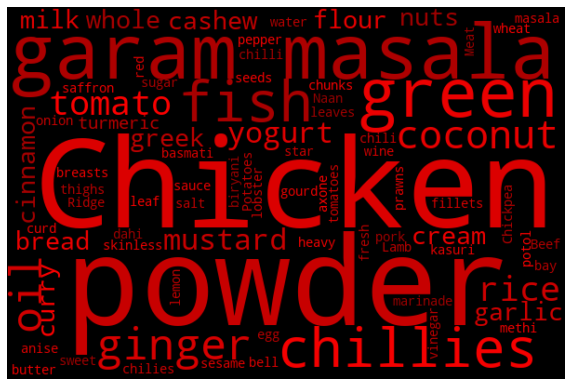

In [42]:
def red_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 100%%, %d%%)" % random.randint(30, 50)
nveg_df = df[df['diet']=='non vegetarian'].reset_index()

ingredients = []
for i in range(0,len(nveg_df)):
    text = nveg_df['ingredients'][i].split(',')
    text = ','.join(text)
    ingredients.append(text)
    text = ' '.join(ingredients)

wordcloud = WordCloud(width = 600, height = 400,min_font_size = 10).generate(text)                  
plt.figure(figsize = (10, 10), facecolor = None) 

default_colors = wordcloud.to_array()
plt.imshow(wordcloud.recolor(color_func=red_color_func, random_state=3), interpolation="bilinear")

plt.axis('off') 
plt.show()

### Top 10 foods with shortest cooking time <a class="anchor" id="section_1_2_12"></a>

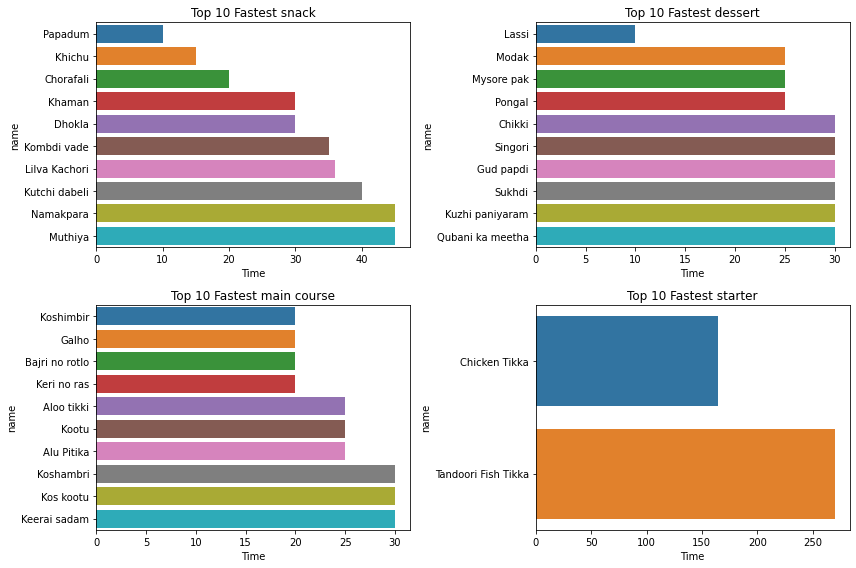

In [43]:
import seaborn as sns
df['Time'] = df['prep_time'] + df['cook_time']


plt.figure(figsize=(12,8))
types=['snack','dessert','main course','starter']

for i in range(len(types)):
  food=types[i]
  snack = df.loc[(df['Time'] != 0) & (df['course'] == food)]
  fast_snacks = snack.sort_values(['Time'], ascending=True)[0:10]
  plt.subplot(2,2,i+1)
  sns.barplot(x=fast_snacks['Time'], y=fast_snacks['name'], orient='h')
  plt.title('Top 10 Fastest '+food)


plt.tight_layout()
plt.show()

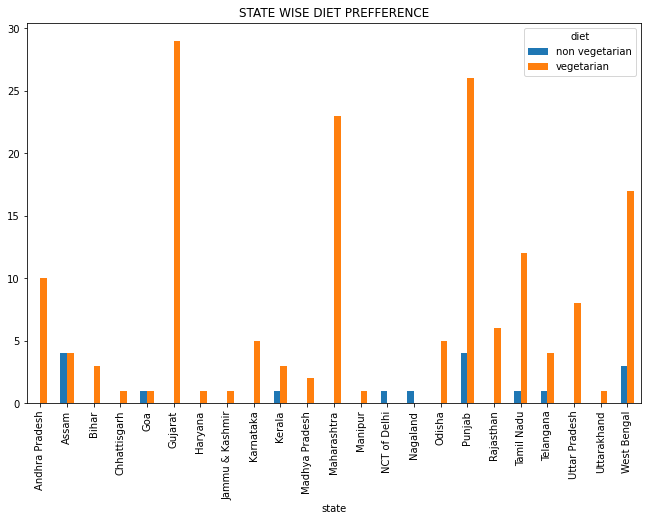

In [44]:
pd.crosstab(df["state"],df["diet"]).plot(kind="bar",figsize=(11,7))
plt.title("STATE WISE DIET PREFFERENCE")
plt.show()

Text(0.5, 1.0, 'cook time')

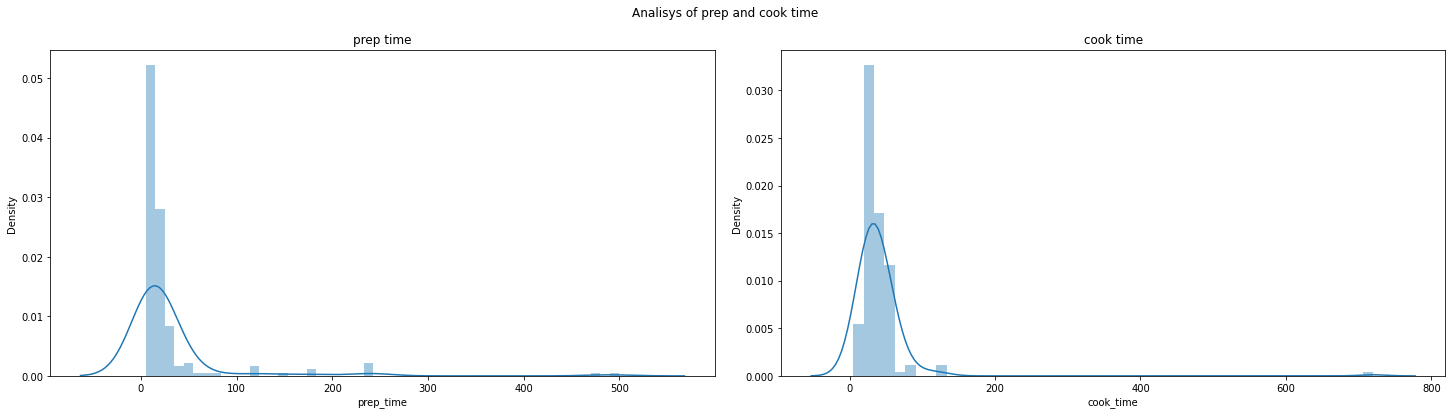

In [48]:
warnings.filterwarnings("ignore")
fig, axes = plt.subplots(1, 2, figsize=(
    25,6), gridspec_kw=dict(wspace=0.1, hspace=0.6))
fig.suptitle("Analisys of prep and cook time")

g_prep_time = sns.distplot(df["prep_time"], ax=axes[0])
g_prep_time.set_title("prep time")

g_cook_time = sns.distplot(df["cook_time"], ax=axes[1])
g_cook_time.set_title("cook time")

